In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def generateDataset(N, f, sigma):
    vf = np.vectorize(f) 
    mu = 0.0
    x= np.linspace(0,1,N)
    normal=np.random.default_rng().normal(mu, sigma, N)
    t = vf(x) + normal
    return x,t

In [3]:
def f(x): return math.sin(2 * math.pi * x)

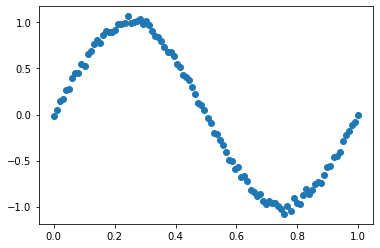

In [4]:
x,t=generateDataset(100, f, 0.03)
plt.scatter(x,t)

In [5]:
def E(w):
    return 0.5*np.dot(y(x)-t,y(x)-t)

In [6]:
def y(x,w,M):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    return np.dot(phi,w)

In [7]:
def optimizeLS(x, t, M):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    prod = np.dot(phi.T, phi)                  
    i = np.linalg.inv(prod)                   
    m = np.dot(i, phi.T)                      
    wLS = np.dot(m, t)  
    return wLS



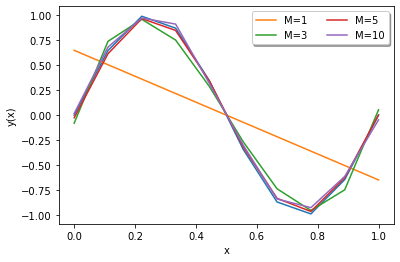

In [8]:
vf = np.vectorize(f) 
x,t = generateDataset(10, f, 0.03)
plt.plot(x, vf(x))
for M in [1,3,5,10]:
    wLS = optimizeLS(x,t,M)
    plt.plot(x, y(x,wLS,M), label=f"M={M}")
    plt.xlabel('x')
    plt.ylabel('y(x)')
leg = plt.legend(loc='best', ncol=2, shadow=True, fancybox=True)
plt.show()

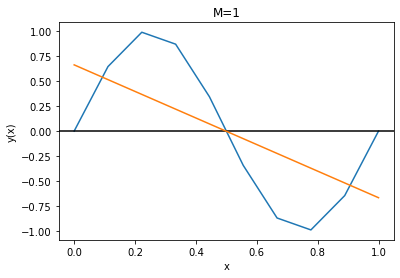

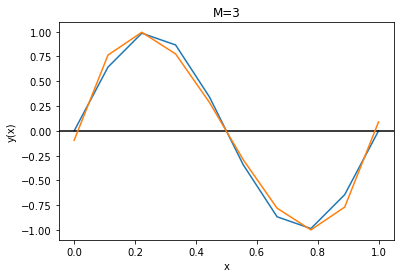

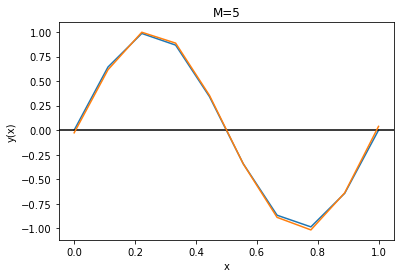

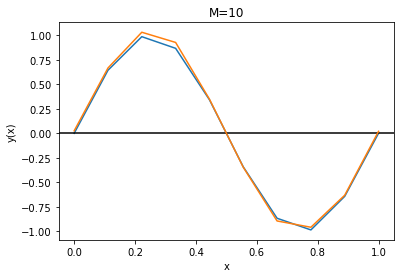

In [9]:

vf = np.vectorize(f) 
x,t = generateDataset(10, f, 0.03)
i=1
for M in [1,3,5,10]:
    wLS = optimizeLS(x,t,M)
    plt.figure(i)
    plt.title(f'M={M}')
    plt.plot(x,vf(x))
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.axhline(y=0, color='k')
    plt.plot(x, y(x,wLS,M),label="m=%m" )
    i=i+1

plt.show()


In [10]:
def optimizePLS(x, t, M, lamda):
    phi= np.array([[a**i for i in range (M+1)]for a in x])
    prod = np.dot(phi.T, phi)+ lamda*np.eye(M+1)                  
    i = np.linalg.inv(prod) 
    m = np.dot(i, phi.T)                      
    wPLS = np.dot(m, t)  
    return wPLS

In [11]:
def generateDataset3(N, f, sigma):
    vf = np.vectorize(f) 
    mu = 0.0
    x= np.linspace(0,1,3*N)
    np.random.shuffle(x)
    normal=np.random.default_rng().normal(mu, sigma, 3*N)
    t = vf(x) + normal
    return x[:N],t[:N],x[N:2*N],t[N:2*N],x[2*N:],t[2*N:]

In [12]:
x1,t1,x2,t2,x3,t3= generateDataset3(10, f, 0.03)
print(x1,'\n','\n',t1,'\n','\n',x2,'\n','\n',t2,'\n','\n',x3,'\n','\n',t3,'\n')

[0.24137931 0.44827586 0.03448276 0.48275862 0.5862069  0.55172414
 0.75862069 0.10344828 0.17241379 0.93103448] 
 
 [ 1.0035053   0.35294187  0.21225874  0.17027102 -0.53838324 -0.27516951
 -1.01611113  0.60644943  0.89441774 -0.42344702] 
 
 [0.72413793 1.         0.4137931  0.27586207 0.96551724 0.13793103
 0.79310345 0.86206897 0.51724138 0.20689655] 
 
 [-0.97997113 -0.00811926  0.4980903   0.96523541 -0.25058273  0.72100247
 -0.95964241 -0.71639831 -0.1347921   0.97188642] 
 
 [0.34482759 0.82758621 0.06896552 0.         0.89655172 0.62068966
 0.37931034 0.65517241 0.68965517 0.31034483] 
 
 [ 0.82729323 -0.87474416  0.38716708 -0.02130692 -0.67447524 -0.70915422
  0.74816382 -0.89671867 -0.95913027  0.93199523] 



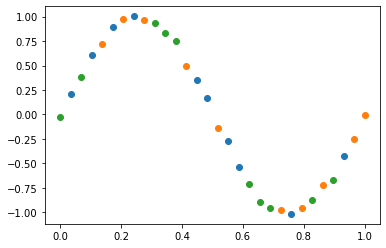

In [13]:
plt.scatter(x1,t1)
plt.scatter(x2,t2)
plt.scatter(x3,t3)

In [14]:
def NEw(x, t, w, N,M):
    err=t-y(x,w,M)
    return (1/N)*(math.sqrt(np.dot(err,err)))

Given the synthetic dataset, optimize for the value of λ by varying the value of log(λ) from -40 to -20
on the development set. Draw the plot of the normalized error of the model for the training, development
and test for the case of N = 10 and the case of N=100. The normalized error of the model is defined as:

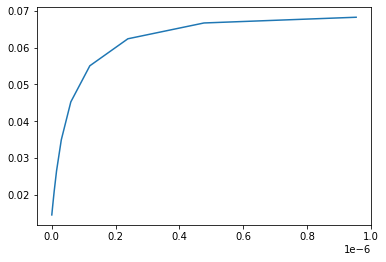

In [15]:
N=10
M=5
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
r=[pow(2,i) for i in range(-40,-19)]
plt.plot(r,NE)

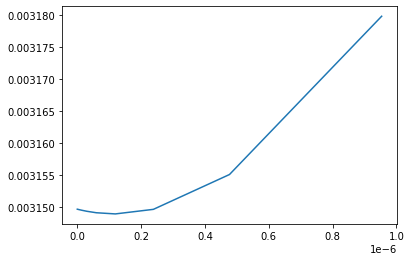

In [16]:
N=100
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
r=[2**i for i in range(-40,-19)]
plt.plot(r,NE)

In [17]:
xt, tt, xv, tv, xts, tts =generateDataset3(N, f, 0.03)

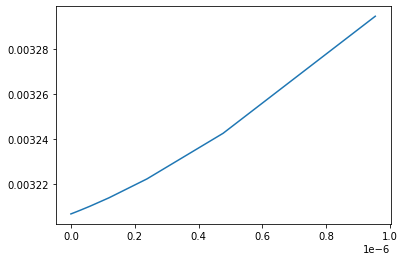

In [18]:
N=100
NE=[]
for i in range (-40,-19):
    lamda= 2**i
    wPLS= optimizePLS(xt, tt, M, lamda)
    NE.append(NEw(xv,tv,wPLS,N,M))
plt.plot([2**i for i in range(-40,-19)],NE)


In [19]:
def optimizePLS2(xt, tt, xv, tv, M):
    NE=[]
    for i in range (-40,-19):
        lamda= 2**i
        wPLS= optimizePLS(xt, tt, M, lamda)
        NE.append(NEw(xv,tv,wPLS,N,M))
    best= np.argmin(NE)-41.
    plt.plot([2**i for i in range(-40,-19)],NE)
    return pow(2,best)

4.547473508864641e-13

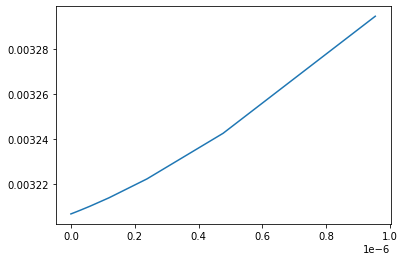

In [20]:
optimizePLS2(xt, tt, xv, tv, M)



something look weird in this plots that change all the time...


In [39]:
def bayesianEstimator(x, t, M, alpha, sigma2):
    phi= np.array([[a**i for i in range (M+1)]for a in x])  
    S_inv= alpha*np.eye(M+1)+ (1/sigma2**2)*np.dot(phi.T,phi)  
    S=np.linalg.inv(S_inv)
    
    def m(y):
        phi_x=np.array([y**i for i in range(M+1)]).T
        prod= np.dot(phi.T,t) 
        m=(1/sigma2**2)*np.dot(np.dot(phi_x.T,S),prod) 
        return m
    def s(y):
        phi_x=np.array([pow(y,i) for i in range(M+1)]).T  
        s=sigma2**2+np.dot(np.dot(phi_x.T,S),phi_x) 
        return s
    return m,s



In [40]:
x, t=generateDataset(100, f, 0.03)

In [41]:
m,s= bayesianEstimator(x, t, 5, 0.1, 0.03)

In [42]:
m(xt[2])

-0.8179565425620424

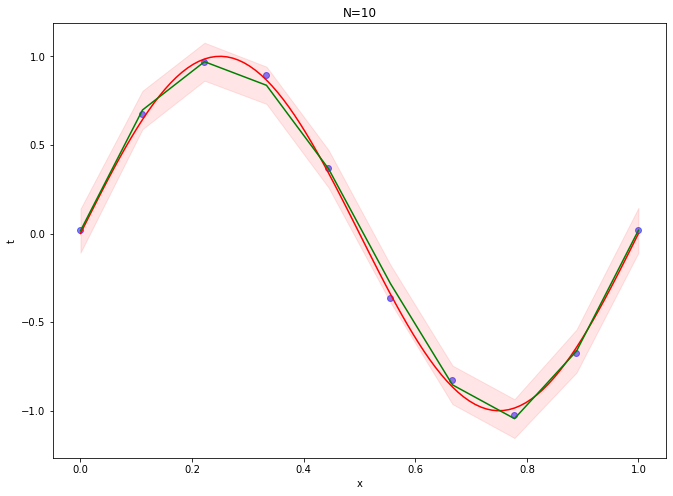

In [78]:
N=10
alpha = 0.005
sigma2 = 1/11.1
M = 9
x1=np.linspace(0,1,100)
x, t=generateDataset(N, f, 0.03)
#figure
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.xlabel("x")
plt.ylabel("t")
plt.title("N=10")
#sin function
plt.plot(x1,vf(x1),color='r')
#mean
m,s= bayesianEstimator(x, t, M, alpha, sigma2)
vm = np.vectorize(m) 
vs = np.vectorize(s)
sqrt_= np.vectorize(math.sqrt)
plt.plot(x,vm(x),color='g')
#points
plt.scatter(x,t,color='b',marker='o',alpha=.5)
# confidence interval
plt.fill_between(x, (vm(x) - np.sqrt(vs(x))), (vm(x) + np.sqrt(vs(x))), color='r', alpha=.1)
plt.show()

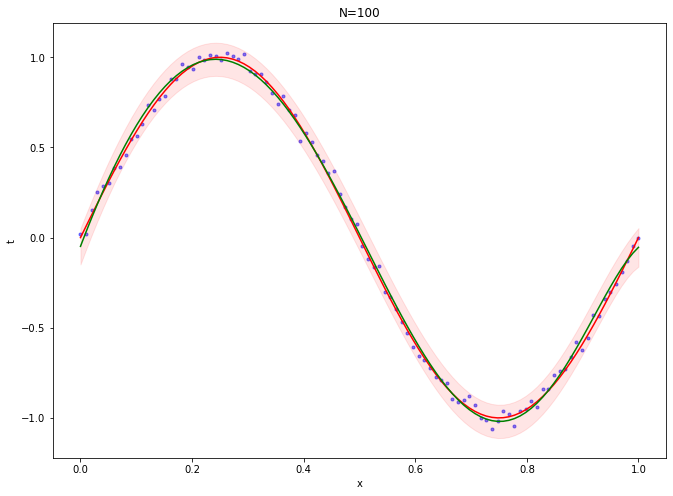

In [79]:
N=100
alpha = 0.005
sigma2 = 1/11.1
M = 9
x1=np.linspace(0,1,100)
x, t=generateDataset(N, f, 0.03)
#figure
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.xlabel("x")
plt.ylabel("t")
plt.title("N=100")
#sin function
plt.plot(x1,vf(x1),color='r')
#mean
m,s= bayesianEstimator(x, t, M, alpha, sigma2)
vm = np.vectorize(m) 
vs = np.vectorize(s)
sqrt_= np.vectorize(math.sqrt)
plt.plot(x,vm(x),color='g')
#points
plt.scatter(x,t,color='b',marker='.',alpha=.5)
# confidence interval
plt.fill_between(x, (vm(x) - np.sqrt(vs(x))), (vm(x) + np.sqrt(vs(x))), color='r', alpha=.1)
plt.show()

Interpret the height of the band around the most likely function in terms of the distribution of the xs in your synthetic dataset. 
Can you think of ways to make this height very small in one segment of the function and large in another?